<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/bdm/RAM/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Dataset -- Water Quality Prediction

> Group Members:

 | Name          | Matric Number  |
 | ------------- | -------------- |
 | MOHAMMED RAZA ASFAK CHIDIMAR     | MCS231004       |
 | AYAZ RAHMAN BHUIYAN    | MCS232001        |
 | MUSAB IBNE AHMAD  | MCS231017        |
 | HUSSEIN YUSUF SHEIKH MOHAMED   | MCS231024       |


*   The dataset appears to be related to water quality prediction and has 5,956,842 records with 24 columns. Here is a brief description of the columns:

1. Index: An index or identifier for each record.
2. pH: Represents the pH level of the water, indicating its acidity or alkalinity.
3. Iron: The concentration of iron in the water.
4. Nitrate: The concentration of nitrate in the water.
5. Chloride: The concentration of chloride in the water.
6. Lead: The concentration of lead in the water.
7. Zinc: The concentration of zinc in the water.
8. Color: Describes the color of the water.
9. Turbidity: A measure of the cloudiness or haziness of the water.
10. Fluoride: The concentration of fluoride in the water.
11.   ... (and more columns, up to 24 in total)

*   The dataset seems to include various parameters related to water quality, such as chemical concentrations (pH, iron, nitrate, etc.), color, turbidity, and other factors. Additionally, there are environmental factors like water and air temperature, month, day, time of day, and a target variable.

*   We will delve into the dataset's organization, discern any discernible patterns, trends, or anomalies, and closely examine the distributions and relationships of variables to uncover potential insights.





#EDA of Big Data

##Import Data from Kaggle using Kaggle API


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
! pip install kaggle
!mkdir ~/.kaggle


In [4]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mitanshuchakrawarty/water-quality-prediction

 99% 935M/944M [00:12<00:00, 56.7MB/s]
100% 944M/944M [00:12<00:00, 76.6MB/s]


In [5]:
!unzip water-quality-prediction.zip

Archive:  water-quality-prediction.zip
  inflating: dataset.csv             


## Importing Libraries





In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()


### Data Importing


In [7]:
df = pd.read_csv("/content/dataset.csv")


### Exploring the Data


In [8]:
df.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [9]:
df.shape

(5956842, 24)

In [10]:
df.size

142964208

In [11]:
df

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   object 
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  object 
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Month                   object 
 21  Day                     float64

## Helper Functions

In [13]:
class DfOverview:
    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

def percent_missing_values(df):
    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_dtype = df.dtypes
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    if mis_val_table_ren_columns.shape[0] == 0:
        return
    return mis_val_table_ren_columns

def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

def plot_dist(df:pd.DataFrame, column:str, color:str='cornflowerblue')->None:
    sns.displot(data=df, x=column, color=color,  kde=False, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plotly_plot_bar(df, x, y, title=None, width=800, color=['cornflowerblue']):
    if title == None:
        title=f'Distribution of {x}'
    fig = px.bar(df, x=x, y=y, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

def plotly_plot_pie(df, column, title=None, width=800, limit=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

Getting Overview Through Explicit Functions

In [14]:
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,Index,5956842,0,0.0%,5956842,100.0%,int64
1,pH,5840788,116054,1.95%,5604784,94.09%,float64
2,Iron,5917089,39753,0.67%,5674876,95.27%,float64
3,Nitrate,5851117,105725,1.77%,5614445,94.25%,float64
4,Chloride,5781311,175531,2.95%,5549789,93.17%,float64
5,Lead,5929933,26909,0.45%,5542383,93.04%,float64
6,Zinc,5800716,156126,2.62%,5567922,93.47%,float64
7,Color,5951103,5739,0.1%,5,0.0%,object
8,Turbidity,5907027,49815,0.84%,5665514,95.11%,float64
9,Fluoride,5767686,189156,3.18%,5537536,92.96%,float64


###Unnecessary Columns Removal

Removing Index and Air Temperature Column Because it's not relevant for our analysis

In [15]:
df = df.drop(columns=['Index', 'Air Temperature'])
df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Month,Day,Time of Day,Target
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,471.683357,3.708178,2.269945e-15,332.118789,NaN,NaN,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,432.844908,3.292038,8.024076e-07,284.641984,Lake,15.348981,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,237.028467,3.516907,2.468295e-02,100.043838,Ground,10.092392,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,June,29.0,7.0,0


Removing recorsds with missing values

In [16]:
df.shape

(5956842, 22)

In [18]:
df.dropna(inplace=True)
df.shape

(4001981, 22)

In [19]:
missing_values = df.isnull()
print("Missing values count per column:")
print(missing_values.sum())

Missing values count per column:
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64


Checking And removing duplicate rows

In [20]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
               pH          Iron    Nitrate    Chloride          Lead  \
381350   7.094725  3.846695e-04   4.633822  219.190550  6.643113e-09   
381351   7.169448  1.147122e-01   6.696260  177.045488  6.436360e-18   
381352   8.141067  4.127095e-03   2.382111  151.646953  5.903851e-01   
381354   7.291275  5.221979e-02   5.613283  166.636594  4.473488e-10   
381358   7.717828  8.480554e-01   7.960188  267.066943  3.770693e-34   
...           ...           ...        ...         ...           ...   
5956830  7.337547  1.208087e-10  10.528503  247.485800  4.674455e-47   
5956834  7.336513  7.989439e-04   3.807672   89.956213  4.258296e-34   
5956835  8.161283  1.468137e-05   6.552120  309.134213  3.368973e-44   
5956837  8.418457  9.517522e-05   8.427576  256.570863  4.751543e-26   
5956841  7.539523  2.276023e-02   4.902591  106.256430  1.399449e-10   

             Zinc           Color  Turbidity  Fluoride    Copper  ...  \
381350   4.722171  Near Colorless   0.750444  

In [21]:
df.drop_duplicates(inplace=True)
df.shape

(3890856, 22)

##Exploratory Data Analysis

###Summary Statistics


In [22]:
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Day,Time of Day,Target
count,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06,3.890856e+06
mean,7.445019e+00,1.275524e-01,6.168438e+00,1.842736e+02,1.499362e-03,1.549566e+00,5.209227e-01,9.642974e-01,5.157753e-01,1.803071e+00,1.460497e+02,4.249608e+02,3.255537e+00,1.091712e-01,2.671221e+02,1.912848e+01,1.572917e+01,1.150859e+01,3.019292e-01
std,8.876757e-01,4.789645e-01,3.255768e+00,6.840631e+01,3.267343e-02,1.545633e+00,9.247657e-01,8.245164e-01,5.953552e-01,1.069455e+00,6.878311e+01,1.899942e+02,7.328513e-01,4.763369e-01,1.558537e+02,1.137005e+01,8.792205e+00,6.923682e+00,4.590948e-01
min,1.542348e+00,8.225557e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.052881e-02,1.156707e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.894524e+00,9.977815e-06,3.972286e+00,1.381244e+02,1.378187e-122,4.149101e-01,3.872775e-02,3.749786e-01,1.289527e-01,8.917616e-01,9.775809e+01,2.863779e+02,2.744340e+00,2.503355e-06,1.329045e+02,1.134686e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,7.449327e+00,2.247310e-03,5.602945e+00,1.759994e+02,2.202041e-62,1.081268e+00,2.097012e-01,7.753319e-01,3.483055e-01,1.774096e+00,1.346119e+02,3.970226e+02,3.209651e+00,6.458715e-04,2.658469e+02,1.643993e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,8.013942e+00,5.447932e-02,7.671090e+00,2.179756e+02,3.562885e-27,2.229829e+00,6.245155e-01,1.341182e+00,7.006978e-01,2.653875e+00,1.817297e+02,5.333351e+02,3.705029e+00,1.666516e-02,3.984704e+02,2.382980e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,1.289698e+01,1.782491e+01,9.639078e+01,1.430549e+03,4.766770e+00,2.836867e+01,2.269674e+01,1.464625e+01,1.188627e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.226447e+01,2.374086e+01,5.797999e+02,2.973086e+02,3.100000e+01,2.300000e+01,1.000000e+00


###Data Visualization

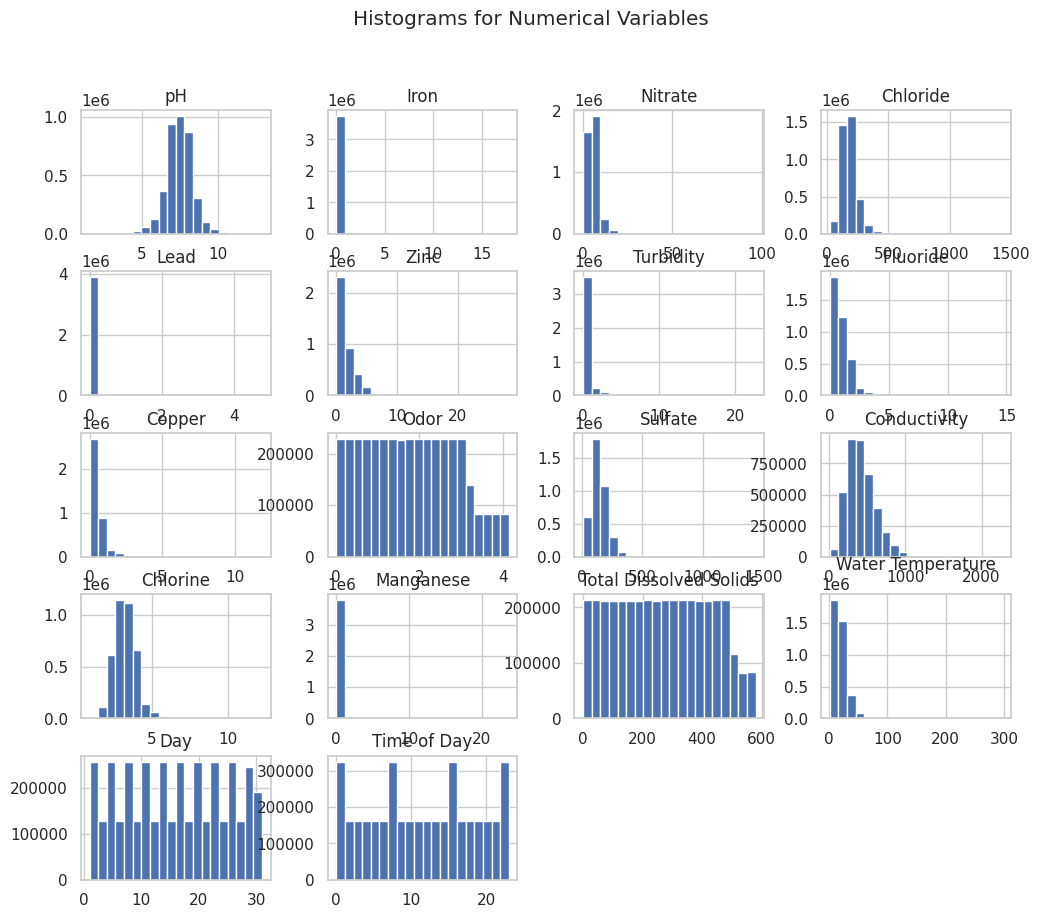

In [23]:
# Setting the style of seaborn for better visualizations
sns.set(style="whitegrid")

# Histograms for numerical variables
numerical_columns = df.select_dtypes(include=['float64']).columns
df[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms for Numerical Variables")
plt.show()

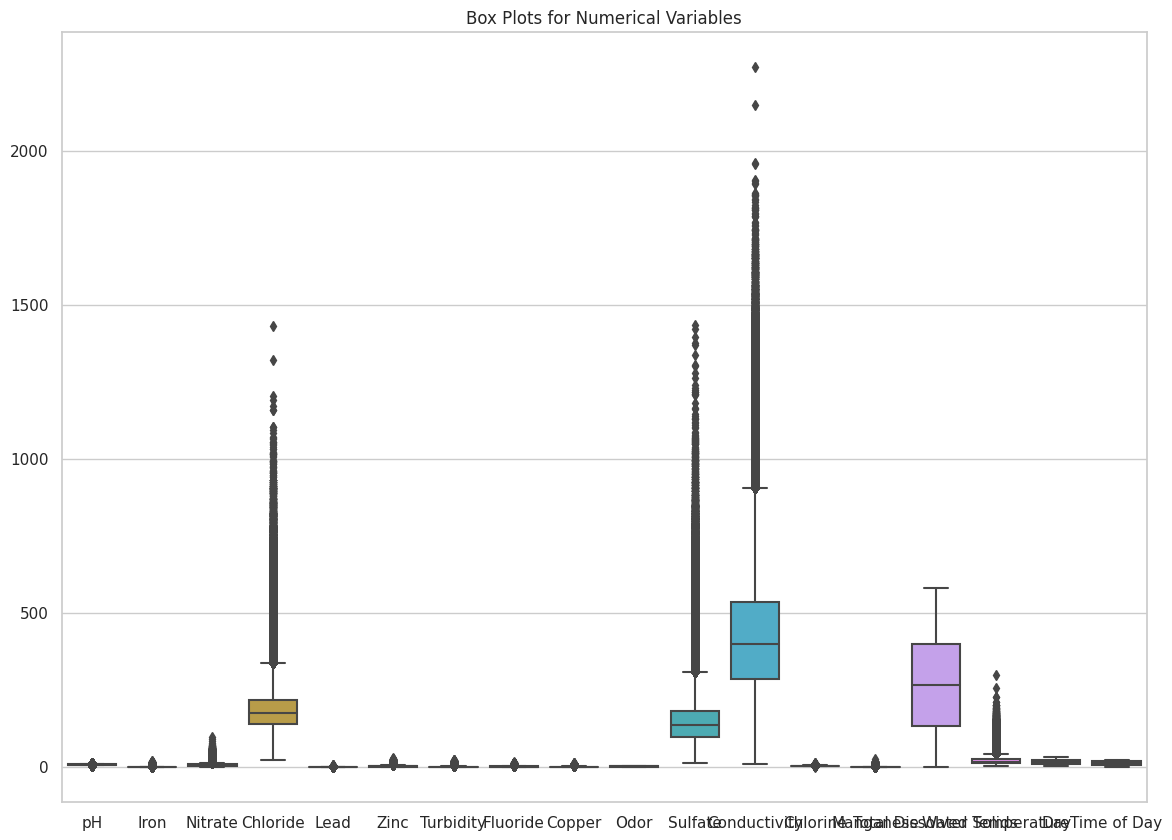

In [24]:
# Box plots for numerical variables
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plots for Numerical Variables")
plt.show()

<ipython-input-27-31f06b5662ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


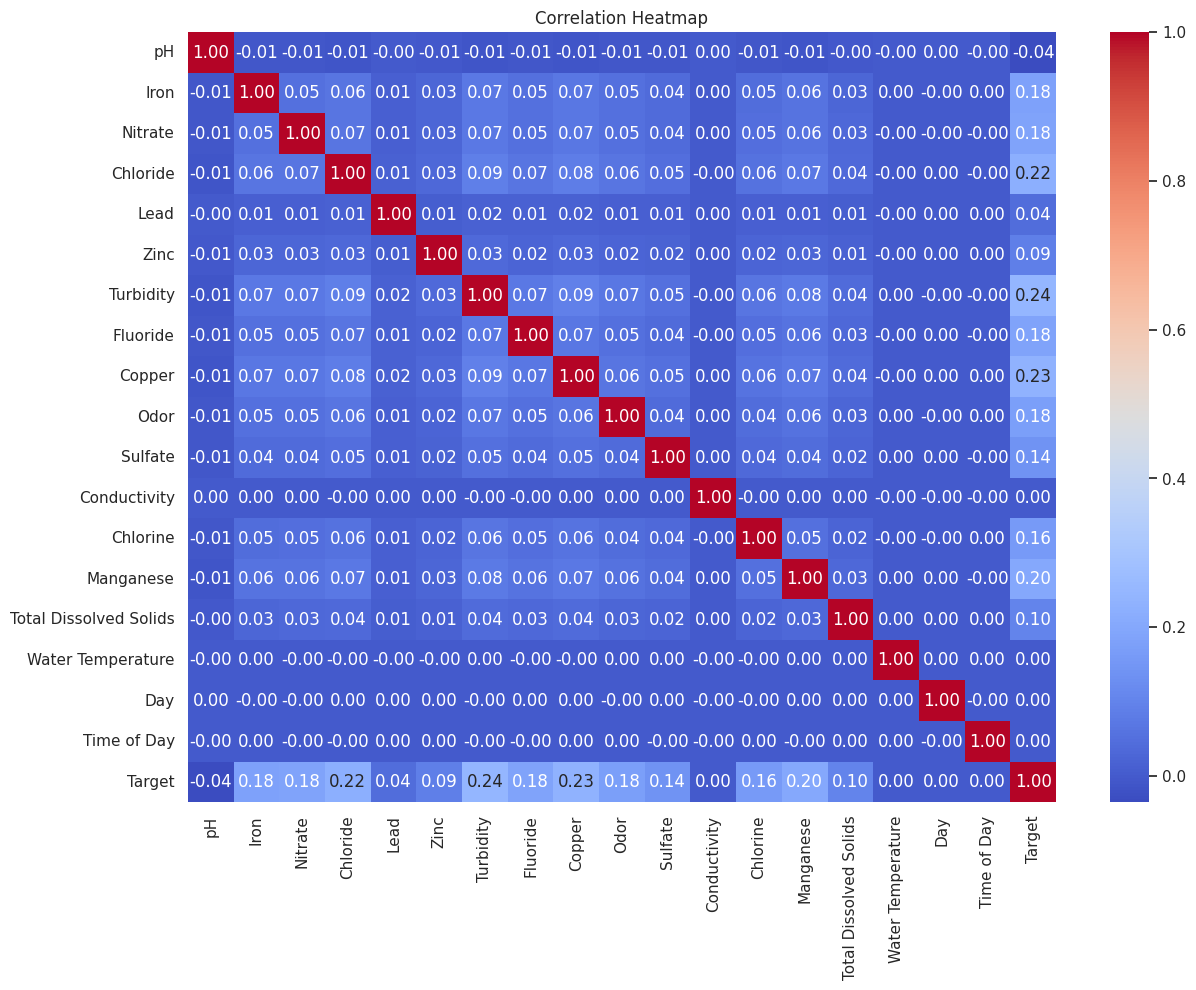

In [27]:
# Heatmap for correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

###Data Exploration

We already performed data explorations tasks above

###Feature Engineering

Interaction Terms: Creating interaction terms by combining relevant numerical features. For example, the product of pH and Nitrate may indicate water quality differently than each feature alone.

In [33]:
df['pH_Nitrate_Interact'] = df['pH'] * df['Nitrate']


Binning Numerical Features:
Convert numerical features into categorical bins to capture non-linear relationships.

In [34]:
df['Iron_Category'] = pd.cut(df['Iron'], bins=[0, 0.01, 0.1, 1, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])


Log Transform:
Apply log transformation to features that exhibit exponential growth or decay.

In [35]:
df['Log_Iron'] = np.log1p(df['Iron'])


**Feature Scaling**:
Standardize numerical features to have zero mean and unit variance.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [38]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Total Dissolved Solids,Source,Water Temperature,Month,Day,Time of Day,Target,pH_Nitrate_Interact,Iron_Category,Log_Iron
1,-0.593861,-0.266141,-0.747680,0.625034,-0.045889,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,284.641984,Lake,15.348981,November,26.0,16.0,0,25.832453,Low,8.053503e-05
2,-2.254491,-0.224331,-0.722239,0.683007,-0.045889,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,570.054094,River,11.643467,January,31.0,8.0,0,20.778806,Medium,1.990641e-02
4,0.728746,-0.261784,1.154060,0.033144,-0.045889,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,168.075545,Spring,15.249416,June,29.0,7.0,0,80.318575,Low,2.164783e-03
7,-0.210455,-0.266309,0.950079,-0.029694,-0.045889,0.416478,Colorless,0.047803,1.016196,0.298093,...,214.553104,River,15.891905,April,11.0,4.0,0,67.223124,Low,6.107130e-09
9,-0.387945,-0.260005,-0.782548,-0.398058,-0.045889,0.112994,Colorless,0.050613,0.842107,0.391602,...,113.909077,River,11.899376,April,7.0,12.0,0,25.708906,Low,3.014489e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956816,0.400327,0.537509,1.070883,0.037103,-0.045889,1.471289,Yellow,1.176665,0.544274,1.063780,...,195.320306,Reservoir,20.056367,July,27.0,3.0,1,75.312529,High,3.257002e-01
5956821,-0.329345,2.131037,3.808807,-0.433310,-0.045889,2.590910,Colorless,0.310290,0.736037,0.030596,...,41.627741,Spring,14.530658,March,5.0,9.0,1,132.818089,Very High,7.646505e-01
5956826,0.204501,1.332083,-0.627598,-1.244515,-0.045887,0.624989,Yellow,0.252538,0.031637,0.975671,...,575.861002,Aquifer,8.254049,April,29.0,19.0,1,31.460472,High,5.684751e-01
5956833,1.053289,-0.266309,-1.097121,1.396298,-0.045889,1.434899,Faint Yellow,0.051479,1.063476,0.042838,...,263.023159,Ground,17.577227,November,22.0,22.0,1,21.758378,Low,8.095122e-08
